### Spectral clustering
Spectral clustering originates from Graph Theory (Spectral Analysis)
The algorithms works as follows:
1. a connectivity matrix / affinity matrix W is formed. This matrix is symmetric and is n x n, where n is the number of observations. If there is a link between observation i and observation j there is a 1 in the matrix at positions $W_{ij}$ and $W_{ji}$. Alternatively, for the affinity matrix, there is a similarity measure indicating the closeness of two observations.
2. the degree matrix $D$ is formed. It is a diagonal matrix that contains for each observation the number of links (or sum of similarities) to other observations.
3. the laplacian matrix $L$ is formed by $L = D -W$. This matrix has several interesting properties:
  * the smallest eigenvalue is always 0. If all observations are connected (fully connected), there is exactly one eigenvalue that is 0.
  * the corresponding eigenvector is constant.
  * are there $r$ connected components (cluster) in the data and if observations are ordered accordingly, the laplacian has block diagonal form:
      
   $ L =
     \begin{bmatrix}
       L_{1} & & \\
       & \ddots & \\
       & & L_{r}
     \end{bmatrix}
   $
  * the blocks $L_i$ are proper laplacian matrices on their own. Since each component (cluster) is connected within, $L_i$ has exactly one eigenvalue that is 0. The corresponding eigenvector is constant and is zero for all other components. These eigenvectors hence are indicator vectors for their component. 

Text(0, 0.5, 'Height')

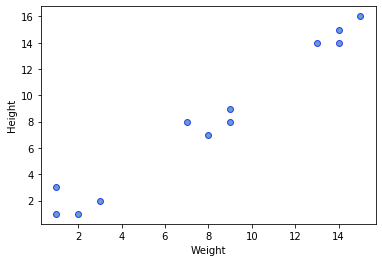

In [ ]:
# this simple example is taken from https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045
import matplotlib.pyplot as plt
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')


Next we buid the connectivity matrix $W$ (also called adjacency matrix). We see, it has three connected components (clusters):

In [ ]:
from sklearn.metrics import pairwise_distances
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


Next we buid the degree matrix $D$ and finally the laplacian as $L = D - W$

In [ ]:
#D = np.diag(np.reshape(W.dot(np.ones((W.shape[1], 1))), (W.shape[1],)))
D = np.diag(W.sum(axis=1))
print(D)

[[4 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 4]]


In [ ]:
L = D - W
print(L)

[[ 3 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1  3 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  3 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1  3]]


Text(0, 0.5, 'eigenvalues')

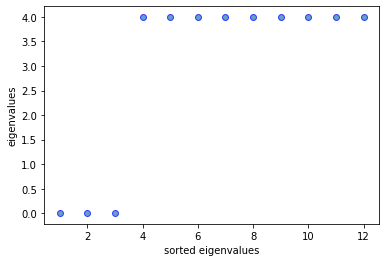

In [ ]:
# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# sort these based on the eigenvalues
eigenvectors = eigenvectors[:,np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
plt.scatter(np.arange(1, W.shape[1]+1), eigenvalues, alpha=0.7, edgecolors='b')
plt.xlabel('sorted eigenvalues')
plt.ylabel('eigenvalues')



In [ ]:
print('corresponding eigenvectors')
print(eigenvectors[:, 0:3])

corresponding eigenvectors
[[-0.5  0.   0. ]
 [-0.5  0.   0. ]
 [-0.5  0.   0. ]
 [-0.5  0.   0. ]
 [ 0.  -0.5  0. ]
 [ 0.  -0.5  0. ]
 [ 0.  -0.5  0. ]
 [ 0.  -0.5  0. ]
 [ 0.   0.  -0.5]
 [ 0.   0.  -0.5]
 [ 0.   0.  -0.5]
 [ 0.   0.  -0.5]]


This is a somewhat contrieved example but it illustrates the principal idea. For data that is not as clear cut as our example the spectral embedding matrix (eigenvectors belonging to the $s$ smallest eigenvalues) can be clustered by k-means. Another possibility is to start with the embedding matrix as a indicator matrix and optimize it as to maximize the in-component connectivity (association) and minimize the between component connectivity (cuts)(see https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf). In the python sklearn library the last method is called 'discretize'.

## Example: 20 newsgroups
<img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" id="20_newsgroups" src="../images/20_newsgroups.png">

In [ ]:
#%reload_ext autoreload
#%autoreload 2
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn import metrics
import nmslib
dataset = fetch_20newsgroups(subset='all', shuffle=True, download_if_missing=True)
# http://qwone.com/~jason/20Newsgroups/

np.random.seed(123)
texts = dataset.data # Extract text
target = dataset.target # Extract target
texts[0:10]
target[0:10]

array([10,  3, 17,  3,  4, 12,  4, 10, 10, 19])

Since we want to cluster newsgroup posts we are more interested in words that are nearly unique to certain groups. By setting max_df = 0.3 we ensure that only words are considered that are not too common, i.e. only in 30% of all posts. By contrast, words that are very seldom but are concerned with special topics discussed in the groups are most important for our endeavor. Hence, there is no limit for min_df.

In [ ]:
# norm='l2' is default
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.3)
X = vectorizer.fit_transform(texts)

In [ ]:
print(f'{X.shape[0]}, {X.shape[1]}')


18846, 173438


# Approximate nearest neighbors
Computing all mutual distances between the 18846 posts can be very time and memory consuming. Theoretically, we only have to compute the triangular matrix minus the diagonal:
$0.5 \cdot 18846^2 - 18846/2 = 177576435$ mutual distances. A clever idea here, is to compute only the k nearest neighbors of each post and treat all other posts as maximal distant. There are a lot of algorithms around for computing nearest neighbors, the most efficient relying on kd-trees.
However, there are als approximate nearest neighbor algorithms that are nearly 100% accurate and are even faster than kd-trees. One of those is the hnsw-algorithm as implemented in the python nmslib (a api for the underlying c++ code).

In [ ]:
# see discussions about 'curse of dimensionality'; to be safe, we opt for cosine-similarity
# since we want to be most efficient in everything we do, we use sparse matrices and vectors
index = nmslib.init(method='hnsw', space='cosinesimil_sparse', data_type=nmslib.DataType.SPARSE_VECTOR)
index.addDataPointBatch(X)
index_time_params = {'post':2}
index.createIndex(index_time_params, print_progress=True)

In [ ]:
# now we can query the index
# By computing distances for the k=1000 neares neighbors, we have to store 1000 * 18846 = 18846000
# distances; but compared to the triangular matrix approach discussed above, we still save 158730435
# entries in our matrix.

nn = 1000
neighbors = index.knnQueryBatch(X, k=nn, num_threads=4)




In [ ]:
from scipy.sparse import csc_matrix
# next we construct a sparse matrix with the distances as measured by cosine similarity
col = np.array([i for n in neighbors for i in n[0].tolist()]) # column indices of nearest neighbors
row = np.repeat(np.arange(0, len(neighbors)), np.array([len(n[0]) for n in neighbors])) # the row index for each nearest neighbor
data = np.array([i for n in neighbors for i in n[1].tolist()]) # the distances

connectivity = csc_matrix((data, (row, col)), shape = (X.shape[0], X.shape[0]))

In [ ]:
# gamma is not needed here, because it is a parameter for constructing the affinity matrix
solution = SpectralClustering(n_clusters = 20, n_components = 21, assign_labels='discretize',\
                              affinity = 'precomputed', gamma=0.7,\
                              eigen_solver='amg').fit(connectivity)
metrics.adjusted_rand_score(solution.labels_, target)

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


0.47012944320662386

In [ ]:
solution = SpectralClustering(n_clusters=20, n_components = 21, assign_labels='discretize',\
                              affinity='rbf',eigen_solver='amg',\
                              gamma = 0.7).fit(X)
metrics.adjusted_rand_score(solution.labels_, target)

0.17378867652568164

In [ ]:
# linear kernel instead of cosine_similarity if tf-idf vectors are already normalized
solution = SpectralClustering(n_clusters=20, n_components = 21, assign_labels='discretize',\
                              affinity='linear',eigen_solver='amg').fit(X)
metrics.adjusted_rand_score(solution.labels_, target)

0.27790619703942143

In [ ]:
solutionKMeans = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1).fit(X)
metrics.adjusted_rand_score(solutionKMeans.labels_, target)

0.08430170579222211

Could we have guessed the right number of clusters from the eigenvalues of the laplacian as suggested in all tutorials about spectral clustering?

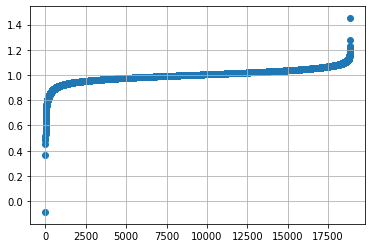

In [ ]:
from scipy.sparse.csgraph import laplacian as csgraph_laplacian
from sklearn.utils import check_array
from sklearn.utils import check_random_state
from sklearn.utils.fixes import lobpcg
from sklearn.manifold._spectral_embedding import _set_diag
from scipy import sparse
from pyamg import smoothed_aggregation_solver
import matplotlib.pyplot as plt

norm_laplacian = True
random_state = check_random_state(1234)

laplacian, dd = csgraph_laplacian(connectivity, normed=norm_laplacian, return_diag=True)
laplacian = check_array(laplacian, dtype=np.float64, accept_sparse=True)
                                
laplacian = _set_diag(laplacian, 1, norm_laplacian)
diag_shift = 1e-5 * sparse.eye(laplacian.shape[0])
laplacian += diag_shift
ml = smoothed_aggregation_solver(check_array(laplacian, 'csr'))
laplacian -= diag_shift
n_components = laplacian.shape[0]
M = ml.aspreconditioner()
X = random_state.rand(laplacian.shape[0], n_components + 1)
X[:, 0] = dd.ravel()
eigs, diffusion_map = lobpcg(laplacian, X, M=M, tol=1.e-5, largest=False)
plt.scatter(np.arange(len(eigs)), eigs)
plt.grid()
plt.show()


In [ ]:
eigs[0:10]

array([-0.08769784,  0.36953977,  0.45080489,  0.48362059,  0.49597784,
        0.51719611,  0.53114538,  0.54800999,  0.56116382,  0.57002931])